In [2]:
#Multiple linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [3]:
#Read dataset
data=pd.read_excel('.xlsx')

In [47]:
data

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48
...,...,...,...,...
195,45.84,4.44,16.56,9.12
196,113.04,5.88,9.72,11.64
197,212.40,11.16,7.68,15.36
198,340.32,50.40,79.44,30.60


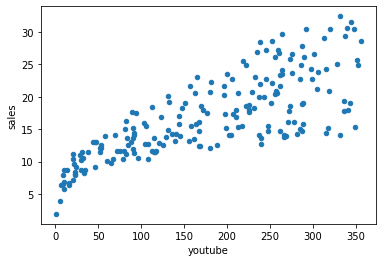

In [48]:
data.plot(kind='scatter', x='youtube', y='sales')
plt.show()

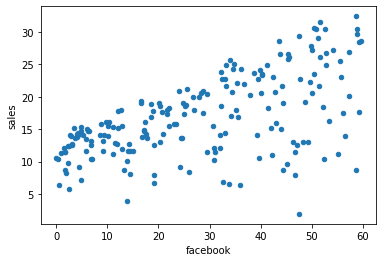

In [49]:
data.plot(kind='scatter', x='facebook', y='sales')
plt.show()

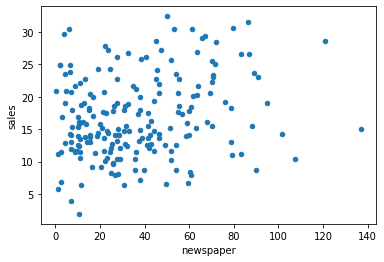

In [50]:
data.plot(kind='scatter', x='newspaper', y='sales')
plt.show()

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


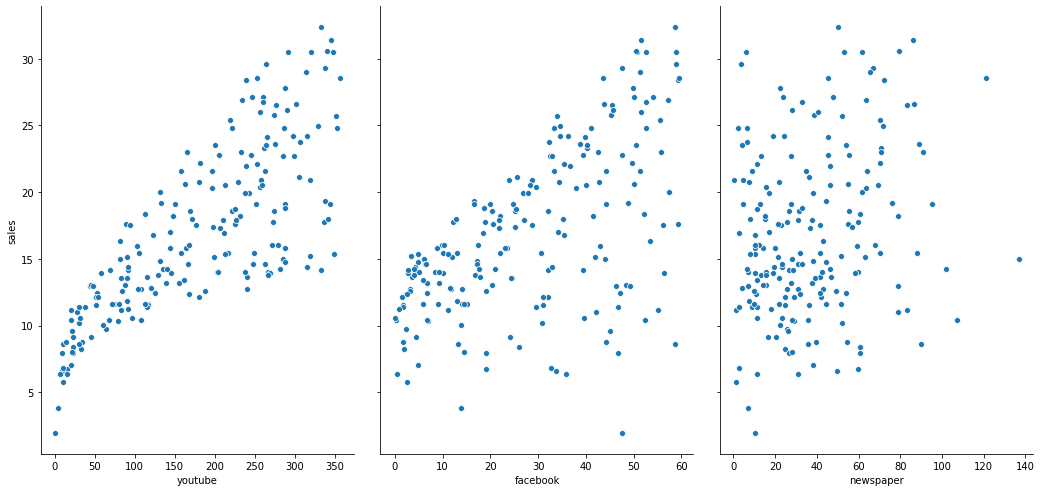

In [77]:
# visualize the relationship between the features and the response using scatterplots
import seaborn as sns
sns.pairplot(data, x_vars=['youtube','facebook','newspaper'], y_vars='sales', size=7, aspect=0.7)

In [51]:
data.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.054809,0.056648,0.782224
facebook,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


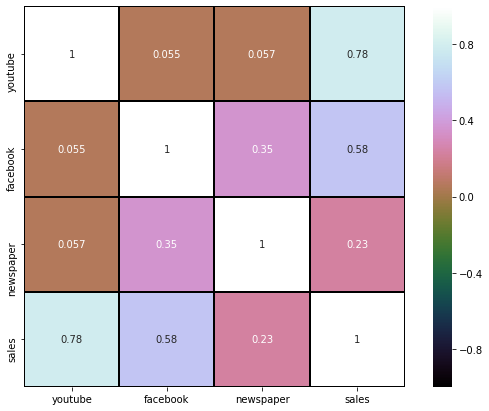

In [52]:
#Plotting heat map
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(data.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [53]:
#X=data[['youtube','facebook','newspaper']] #independent variables
X=data.drop('sales',axis=1)
Y=data['sales'] #dependent variable

In [54]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
sale_model=lm.fit(X,Y)

In [55]:
#Parameters of the model
print('R square:', sale_model.score(X, Y))
print('Slope:', sale_model.coef_)
print('intercept:',sale_model.intercept_ )

R square: 0.8972106381789522
Slope: [ 0.04576465  0.18853002 -0.00103749]
intercept: 3.5266672433512944


In [56]:
print ('Estimate interceptv coefficient:', sale_model.intercept_)

Estimate interceptv coefficient: 3.5266672433512944


In [57]:
print('Number of Coefficients:', len(sale_model.coef_))

Number of Coefficients: 3


In [58]:
pd.DataFrame(sale_model.coef_, X.columns)

,0
youtube,0.045765
facebook,0.188530
newspaper,-0.001037


In [59]:
"""
Interpretation
From the output above:
the estimated regression line equation can be written as follow: 
sales = 3.27 + 0.046*youtube + 0.19*facebook - 0.001*newspaper
"""

'\nInterpretation\nFrom the output above:\nthe estimated regression line equation can be written as follow: \nsales = 3.27 + 0.046*youtube + 0.19*facebook - 0.001*newspaper\n'

In [60]:
Y_pred=sale_model.predict(X)

In [61]:
Y_pred=pd.DataFrame(Y_pred, columns=['salse_predict'])
Y_pred

,salse_predict
0,24.628769
1,14.805426
2,14.769205
3,21.117395
4,15.826406
...,...
195,6.444411
196,9.798375
197,15.343105
198,28.520786


In [62]:
#Compare with true Salary
result_compare=pd.concat([X,Y,Y_pred], axis=1)
result_compare

,youtube,facebook,newspaper,sales,salse_predict
0,276.12,45.36,83.04,26.52,24.628769
1,53.40,47.16,54.12,12.48,14.805426
2,20.64,55.08,83.16,11.16,14.769205
3,181.80,49.56,70.20,22.20,21.117395
4,216.96,12.96,70.08,15.48,15.826406
...,...,...,...,...,...
195,45.84,4.44,16.56,9.12,6.444411
196,113.04,5.88,9.72,11.64,9.798375
197,212.40,11.16,7.68,15.36,15.343105
198,340.32,50.40,79.44,30.60,28.520786


In [63]:
result_compare['Deviation']=result_compare['sales']-result_compare['salse_predict']
result_compare

,youtube,facebook,newspaper,sales,salse_predict,Deviation
0,276.12,45.36,83.04,26.52,24.628769,1.891231
1,53.40,47.16,54.12,12.48,14.805426,-2.325426
2,20.64,55.08,83.16,11.16,14.769205,-3.609205
3,181.80,49.56,70.20,22.20,21.117395,1.082605
4,216.96,12.96,70.08,15.48,15.826406,-0.346406
...,...,...,...,...,...,...
195,45.84,4.44,16.56,9.12,6.444411,2.675589
196,113.04,5.88,9.72,11.64,9.798375,1.841625
197,212.40,11.16,7.68,15.36,15.343105,0.016895
198,340.32,50.40,79.44,30.60,28.520786,2.079214


In [64]:
result_compare['Deviation'].sum()

2.0250467969162855e-13

In [65]:
#Predict more values
X_new=[[70,40,50],[120,60,30],[220,70,80]]
X_new=pd.DataFrame(X_new, columns=['youtube','facebook','newsapaper'])
sale_predict=sale_model.predict(X_new)
sale_predict=pd.DataFrame(sale_predict, columns=['Sale_Predicted'])
df= pd.concat([X_new, sale_predict], axis=1)
df

,youtube,facebook,newsapaper,Sale_Predicted
0,70,40,50,14.219518
1,120,60,30,20.299101
2,220,70,80,26.708991


In [75]:
#Lets calculate the mean squared error
import numpy as np
mse=np.mean((data['sales']-sale_model.predict(X))**2)
print (mse)

4.00914189289575


In [76]:
((result_compare['Deviation'])**2).sum()/200

4.009141892895748